## 007_Control Simulation 
## Discretization Model 

<img src="007_Discretization.png" style="width: 1000px;"/>
<img src="007_DiscretizationSS.png" style="width: 1000px;"/>
<img src="007_DiscretizationLibrary.png" style="width: 1000px;"/>
<img src="007_DiscretizationEX1.png" style="width: 1000px;"/>

In [1]:
import scipy.signal as sig

K = 3
T = 4

# State-Space model
A = [[-1/T, 0], [0, 0]]

B = [[K/T], [0]]

C = [[1, 0]]

D = 0

sys = sig.StateSpace(A, B, C, D)
print(sys)

sys_d = sys.to_discrete(dt=0.1, method='euler')
print(sys_d)

c:\Users\JAMES\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\Users\JAMES\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:205: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


StateSpaceContinuous(
array([[-0.25,  0.  ],
       [ 0.  ,  0.  ]]),
array([[0.75],
       [0.  ]]),
array([[1, 0]]),
array([[0]]),
dt: None
)
StateSpaceDiscrete(
array([[0.975, 0.   ],
       [0.   , 1.   ]]),
array([[0.075],
       [0.   ]]),
array([[1., 0.]]),
array([[0.]]),
dt: 0.1
)


## Mass-spring-damper system
<img src="007_MassSpringDamper.png" style="width: 1000px;"/>
<img src="007_MassSpringDamper02.png" style="width: 1000px;"/>

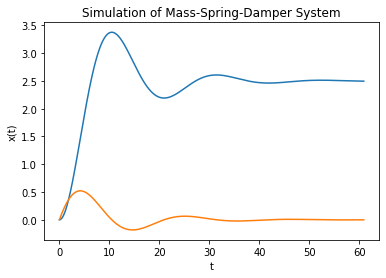

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Parameters defining the system
c = 4 # Damping constant
k = 2 # Stiffness of the spring
m = 20 # mass
F = 5 # Force
Ft = np.ones(610)*F

# Simulation paramters
tstart = 0
tstop = 60
increment = 0.1
t = np.arange(tstart, tstop+1, increment)

# System matrices
A = [[0, 1], [-k/m, -c/m]]
B = [[0], [1/m]]
C = [[1, 0]]
sys = sig.StateSpace(A, B, C, 0)

# Step response for the system
t, y, x = sig.lsim(sys, Ft, t)
x1 = x[:, 0]
x2 = x[:, 1]

plt.plot(t, x1, t, x2)
plt.title('Simulation of Mass-Spring-Damper System')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid
plt.show()